# BioLiP clusters

On this page, I'll apply the cluster labels to the BioLiP data, and investigate
the distribution of clusters.


## Setup

Add user's current working directory to search path:

In [1]:
import sys
sys.path = [r"C:\sw\plb"] + sys.path

Also change current working directory:

In [2]:
import os
os.chdir(r"C:\sw\plb")

Imports:

In [3]:
from collections import Counter
from pathlib import Path

import bokeh.io
import myst_nb

from src.config import get_config
from src.data_structure_utils import read_tsv
from src.stats_utils import (
    get_stats_from_counter,
    print_counter_stats_df,
)
from src.plotting_functions import (
    plot_cluster_counts_bdb_biolip_combined,
    plot_cluster_counts_single_dataset,
)


Set up document options:

In [4]:
# This import automatically sets seeds
import src.set_seed

# Nice pandas tables
import itables
itables.init_notebook_mode(all_interactive=True)
itables.options.maxColumns = 0  # unlimited columns
itables.options.maxBytes = 32000000
itables.options.classes = ["display", "nowrap"]
itables.options.order = [] # disable auto-sorting

# Set up bokeh interactive plots
bokeh.io.output_notebook()

<IPython.core.display.Javascript object>

Loading BokehJS ...

Get filepaths of data directories:

In [5]:
config = get_config()
dir_data = Path(config["data_directory"])
dir_features = Path(config["features_directory"])

Load dataframe with cluster assignments:

In [6]:
df_biolip_ann_with_clusters = read_tsv(dir_features / "df_biolip_ann_with_clusters.tsv")

## Distribution of protein clusters

Similarly to BindingDB, we can generate statistics for the protein cluster
counts in BioLiP:

Total number of entries: 20220
Total number of unique entries: 2917
Distribution of frequencies of individual entries, linear scale (left):
Distribution of frequencies of individual entries, log scale (right):


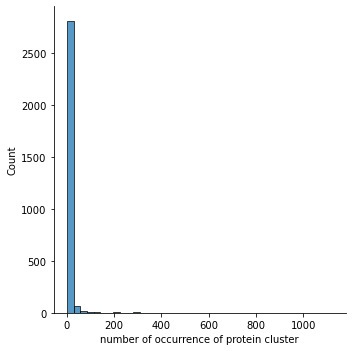

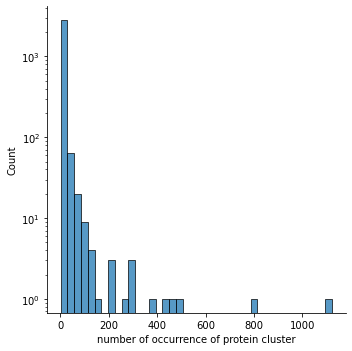

In [7]:
biolip_cluster_counts_p: Counter[str] = Counter(
    df_biolip_ann_with_clusters["protein_cluster"]
)
biolip_cluster_stats_p = get_stats_from_counter(
    counts=biolip_cluster_counts_p,
    ntop=30,
    nbins=40,
    name_of_thing_being_counted="protein_cluster_counts",
    xaxis_name="number of occurrence of protein cluster",
    do_show=True,
)

Most commonly occuring protein clusters:

In [8]:
print_counter_stats_df(biolip_cluster_stats_p)

Loading... (need help?)


## Distribution of ligand clusters

Let's do the same, but for the ligand clusters:

Total number of entries: 20220
Total number of unique entries: 3884
Distribution of frequencies of individual entries, linear scale (left):
Distribution of frequencies of individual entries, log scale (right):


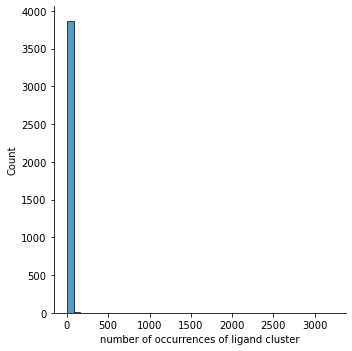

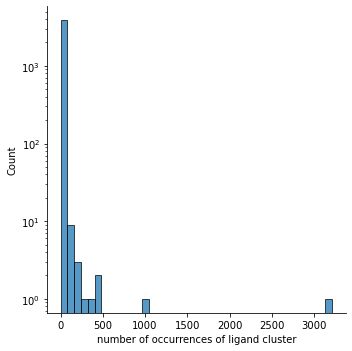

In [9]:
biolip_cluster_counts_l: Counter[str] = Counter(
    df_biolip_ann_with_clusters["ligand_cluster"]
)
biolip_cluster_stats_l = get_stats_from_counter(
    counts=biolip_cluster_counts_l,
    ntop=30,
    nbins=40,
    name_of_thing_being_counted="ligand_cluster_counts",
    xaxis_name="number of occurrences of ligand cluster",
    do_show=True,
)

Most commonly occuring ligand clusters:

In [10]:
print_counter_stats_df(biolip_cluster_stats_l)

Loading... (need help?)


## Distribution of (p, l) cluster tuples

Finally, we can show the statistics and plots for the $(p,l)$ cluster tuples
present in the BioLiP data like we did for the BindingDB data:

Total number of entries: 20220
Total number of unique entries: 9272
Distribution of frequencies of individual entries, linear scale (left):
Distribution of frequencies of individual entries, log scale (right):


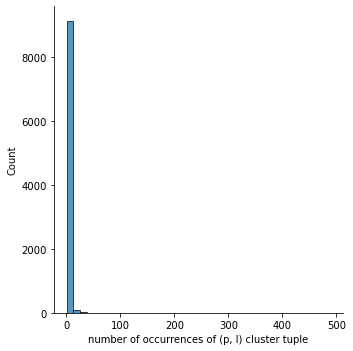

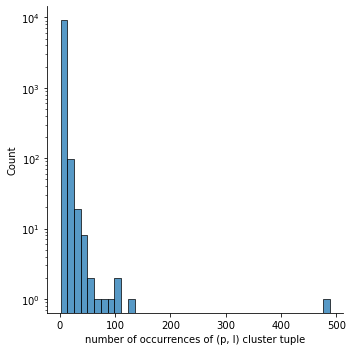

In [11]:
biolip_cluster_counts_pl: Counter[tuple[str, str]] = Counter(
    zip(
        df_biolip_ann_with_clusters["protein_cluster"],
        df_biolip_ann_with_clusters["ligand_cluster"],
    )
)
biolip_cluster_stats_pl = get_stats_from_counter(
    counts=biolip_cluster_counts_pl,
    ntop=30,
    nbins=40,
    name_of_thing_being_counted="pl_cluster_tuple",
    xaxis_name="number of occurrences of (p, l) cluster tuple",
    do_show=True,
)

The most commonly occuring $(p,l)$ cluster pairs are:

In [12]:
print_counter_stats_df(biolip_cluster_stats_pl)

Loading... (need help?)


Heatmap (after reindexing $p$ and $l$ values):

In [13]:
plot_cluster_counts_single_dataset(
    pl_counts=biolip_cluster_counts_pl, backend="bokeh", permute_rows_and_columns=False
)

The same heatmap, but with permuted rows and columns (to put most of the points
near the top left):

In [14]:
plot_cluster_counts_single_dataset(
    pl_counts=biolip_cluster_counts_pl, backend="bokeh", permute_rows_and_columns=True
)